<a href="https://colab.research.google.com/github/vpagonis/Python-Codes/blob/main/Ch11PagonisGitHub/3K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

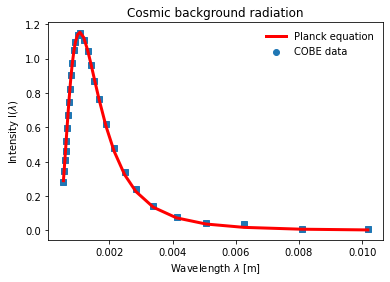

Temperature of background radiation from best fit = 2.71  K


In [3]:

import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import matplotlib.pyplot as plt
import pandas as pd

# experimental data adapted from 
# http://hyperphysics.phy-astr.gsu.edu/hbase/bkg3k.html#c1

url='https://github.com/vpagonis/Python-Codes/raw/main/Ch11PagonisGitHub/3K.txt'
df =pd.read_table(url,delimiter=',')
    
x_data = df.iloc[:, 0].to_numpy()
x_data=0.001*x_data  # wavelength is in mm, change to m
y_data = df.iloc[:, 1].to_numpy()

plt.plot(x_data,y_data,'s')

h = 6.626e-34    # Planck constant in J s
k = 1.380649e-23 # Boltzmann constant in J/K
c = 2.998e8      # speed of light m/s
# T = black body Temperature in K
# x = wavelength is in meters
# y = intensity
# A = scaling factor for intensity

# function for evaluating the Planck black body equation
def Planck(x,T,A):    
    return (A*2*h*c**2.0/x**5.0)*1/(np.exp(h*c/(x*k*T))-1)

inis=[2.7,400]  # starting values (T, A) for the fit

# find optimal parameters 
params, cov=optimize.curve_fit(Planck,x_data,y_data,inis)
# params are the best fit values for the parameters (T,A)
# cov is the covariance of the best fit parameters 

plt.scatter(x_data, y_data, label='COBE data');
plt.plot(x_data, Planck(x_data, *params),
c='r',linewidth=3, label='Planck equation'); 
plt.xlabel('Wavelength $\lambda$ [m]');
plt.ylabel(r'Intensity I(${\lambda}$)');
plt.title('Cosmic background radiation');
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.show()
print('Temperature of background radiation from best fit =',round(params[0],2),' K')
